# Import data

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
data_immo = pd.read_csv("data_immo.csv")

In [4]:
data_immo

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0            2072    -119.84     36.77                 6.0       1853.0   
1           10600    -117.80     33.68                 8.0       2032.0   
2            2494    -120.19     36.60                25.0        875.0   
3            4284    -118.32     34.10                31.0        622.0   
4           16541    -121.23     37.79                21.0       1922.0   
...           ...        ...       ...                 ...          ...   
16507        1099    -121.90     39.59                20.0       1465.0   
16508       18898    -122.25     38.11                49.0       2365.0   
16509       11798    -121.22     38.92                19.0       2531.0   
16510        6637    -118.14     34.16                39.0       2776.0   
16511        2575    -124.13     40.80                31.0       2152.0   

       total_bedrooms  population  households  median_income  \
0               473.0      1397.0       417.0         1.4817   
1               349.0       862.0       340.0         6.9133   
2               214.0       931.0       214.0         1.5536   
3               229.0       597.0       227.0         1.5284   
4               373.0      1130.0       372.0         4.0815   
...               ...         ...         ...            ...   
16507           278.0       745.0       250.0         3.0625   
16508           504.0      1131.0       458.0         2.6133   
16509           461.0      1206.0       429.0         4.4958   
16510           840.0      2546.0       773.0         2.5750   
16511           462.0      1259.0       420.0         2.2478   

       median_house_value ocean_proximity  
0                 72000.0          INLAND  
1                274100.0       <1H OCEAN  
2                 58300.0          INLAND  
3                200000.0       <1H OCEAN  
4                117900.0          INLAND  
...                   ...             ...  
16507             93800.0          INLAND  
16508            103100.0        NEAR BAY  
16509            192600.0          INLAND  
16510            153500.0       <1H OCEAN  
16511             81100.0      NEAR OCEAN  

[16512 rows x 11 columns]

# Data cleaning

## Drop_duplicates test

In [5]:
test_without_unnamed = data_immo.drop('Unnamed: 0',axis= 1)

In [6]:
test_without_unnamed.drop_duplicates()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -119.84     36.77                 6.0       1853.0           473.0   
1        -117.80     33.68                 8.0       2032.0           349.0   
2        -120.19     36.60                25.0        875.0           214.0   
3        -118.32     34.10                31.0        622.0           229.0   
4        -121.23     37.79                21.0       1922.0           373.0   
...          ...       ...                 ...          ...             ...   
16507    -121.90     39.59                20.0       1465.0           278.0   
16508    -122.25     38.11                49.0       2365.0           504.0   
16509    -121.22     38.92                19.0       2531.0           461.0   
16510    -118.14     34.16                39.0       2776.0           840.0   
16511    -124.13     40.80                31.0       2152.0           462.0   

       population  households  median_income  median_house_value  \
0          1397.0       417.0         1.4817             72000.0   
1           862.0       340.0         6.9133            274100.0   
2           931.0       214.0         1.5536             58300.0   
3           597.0       227.0         1.5284            200000.0   
4          1130.0       372.0         4.0815            117900.0   
...           ...         ...            ...                 ...   
16507       745.0       250.0         3.0625             93800.0   
16508      1131.0       458.0         2.6133            103100.0   
16509      1206.0       429.0         4.4958            192600.0   
16510      2546.0       773.0         2.5750            153500.0   
16511      1259.0       420.0         2.2478             81100.0   

      ocean_proximity  
0              INLAND  
1           <1H OCEAN  
2              INLAND  
3           <1H OCEAN  
4              INLAND  
...               ...  
16507          INLAND  
16508        NEAR BAY  
16509          INLAND  
16510       <1H OCEAN  
16511      NEAR OCEAN  

[16512 rows x 10 columns]

--- as we can see there's no duplicates rows in this data ---

## Missing values

In [7]:
missing_values_count = data_immo.isnull().sum()
missing_values_count

Unnamed: 0              0
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        176
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
total_cells = np.product(data_immo.shape)
total_missing = missing_values_count.sum()

In [9]:
percent_missing = (total_missing/total_cells) * 100
print(percent_missing)

0.09689922480620156


--- There's 176 missing values in the column "total_bedrooms".
It's  0.09% of our dataset.---

## Imputation

In [10]:
total_bedrooms_only_nan = data_immo[data_immo['total_bedrooms'].isna()]
total_bedrooms_only_nan

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
33           5723    -118.23     34.18                45.0       2332.0   
171          2578    -124.06     40.86                34.0       4183.0   
178         10033    -121.08     39.22                30.0       2188.0   
179         19485    -120.98     37.66                10.0        934.0   
259         19766    -122.10     40.03                25.0       2516.0   
...           ...        ...       ...                 ...          ...   
16002       17202    -119.73     34.44                38.0       1729.0   
16089       17041    -122.28     37.51                33.0       4719.0   
16214        4591    -118.28     34.06                42.0       2472.0   
16228        9942    -122.23     38.17                45.0        350.0   
16323        2301    -119.78     36.82                25.0       5016.0   

       total_bedrooms  population  households  median_income  \
33                NaN       943.0       339.0         8.1132   
171               NaN      1891.0       669.0         3.2216   
178               NaN      1033.0       437.0         2.1419   
179               NaN       401.0       255.0         0.9336   
259               NaN      1266.0       494.0         1.7566   
...               ...         ...         ...            ...   
16002             NaN       801.0       395.0         3.1364   
16089             NaN      1980.0       757.0         6.1064   
16214             NaN      3795.0      1179.0         1.2254   
16228             NaN       225.0        72.0         1.8942   
16323             NaN      2133.0       928.0         3.6250   

       median_house_value ocean_proximity  
33               446600.0       <1H OCEAN  
171               98100.0      NEAR OCEAN  
178              105200.0          INLAND  
179              127100.0          INLAND  
259               58400.0          INLAND  
...                   ...             ...  
16002            357500.0      NEAR OCEAN  
16089            405000.0      NEAR OCEAN  
16214            162500.0       <1H OCEAN  
16228            216700.0        NEAR BAY  
16323             89500.0          INLAND  

[176 rows x 11 columns]

In [11]:
med_total_bedrooms = data_immo["total_bedrooms"].median()
med_total_bedrooms

435.0

--- I decided to keep 2 dataset, one without imputation and one with. ---

In [12]:
data_immo_with_imputation = data_immo

In [13]:
data_immo_with_imputation['total_bedrooms'] = data_immo.total_bedrooms.fillna(435.0)

In [14]:
data_immo_with_imputation.head()

Unnamed: 0  longitude  latitude  housing_median_age  total_rooms  \
0        2072    -119.84     36.77                 6.0       1853.0   
1       10600    -117.80     33.68                 8.0       2032.0   
2        2494    -120.19     36.60                25.0        875.0   
3        4284    -118.32     34.10                31.0        622.0   
4       16541    -121.23     37.79                21.0       1922.0   

   total_bedrooms  population  households  median_income  median_house_value  \
0           473.0      1397.0       417.0         1.4817             72000.0   
1           349.0       862.0       340.0         6.9133            274100.0   
2           214.0       931.0       214.0         1.5536             58300.0   
3           229.0       597.0       227.0         1.5284            200000.0   
4           373.0      1130.0       372.0         4.0815            117900.0   

  ocean_proximity  
0          INLAND  
1       <1H OCEAN  
2          INLAND  
3       <1H OCEAN  
4          INLAND

In [15]:
data_immo_with_imputation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          16512 non-null  int64  
 1   longitude           16512 non-null  float64
 2   latitude            16512 non-null  float64
 3   housing_median_age  16512 non-null  float64
 4   total_rooms         16512 non-null  float64
 5   total_bedrooms      16512 non-null  float64
 6   population          16512 non-null  float64
 7   households          16512 non-null  float64
 8   median_income       16512 non-null  float64
 9   median_house_value  16512 non-null  float64
 10  ocean_proximity     16512 non-null  object 
dtypes: float64(9), int64(1), object(1)
memory usage: 1.4+ MB


--- Now we have 2 dataset: data_immo and data_immo_with_imputation ---

## Scaling

In [16]:
data_immo_with_imputation['ocean_proximity'].value_counts()

<1H OCEAN     7312
INLAND        5235
NEAR OCEAN    2140
NEAR BAY      1821
ISLAND           4
Name: ocean_proximity, dtype: int64

In [17]:
data_immo_with_imputation['ocean_proximity_number'] = data_immo_with_imputation['ocean_proximity'].replace(['<1H OCEAN','INLAND','NEAR OCEAN','NEAR BAY','ISLAND'], [0,1,2,3,4])

In [18]:
data_immo['ocean_proximity_number'] = data_immo['ocean_proximity'].replace(['<1H OCEAN','INLAND','NEAR OCEAN','NEAR BAY','ISLAND'], [0,1,2,3,4])

In [19]:
immo_with_imputation = data_immo_with_imputation.drop('ocean_proximity',axis = 1)

In [20]:
immo = data_immo.drop('ocean_proximity',axis = 1)

In [21]:
columns = np.array(immo.drop(['Unnamed: 0','longitude','latitude'],axis = 1).columns)

In [22]:
columns_with = np.array(immo_with_imputation.drop(['Unnamed: 0','longitude','latitude'],axis = 1).columns)

In [23]:
pip install mlxtend  

Note: you may need to restart the kernel to use updated packages.


In [24]:
# modules we'll use
import pandas as pd
import numpy as np

# for Box-Cox Transformation
from scipy import stats

# for min_max scaling
from mlxtend.preprocessing import minmax_scaling

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

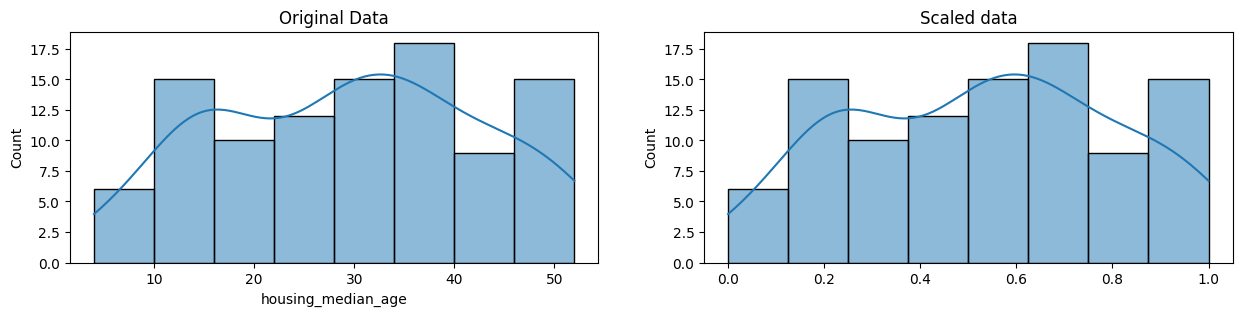

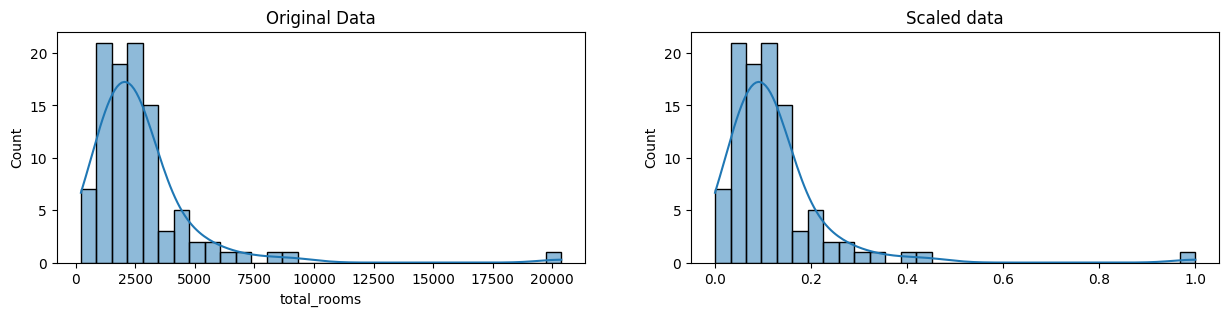

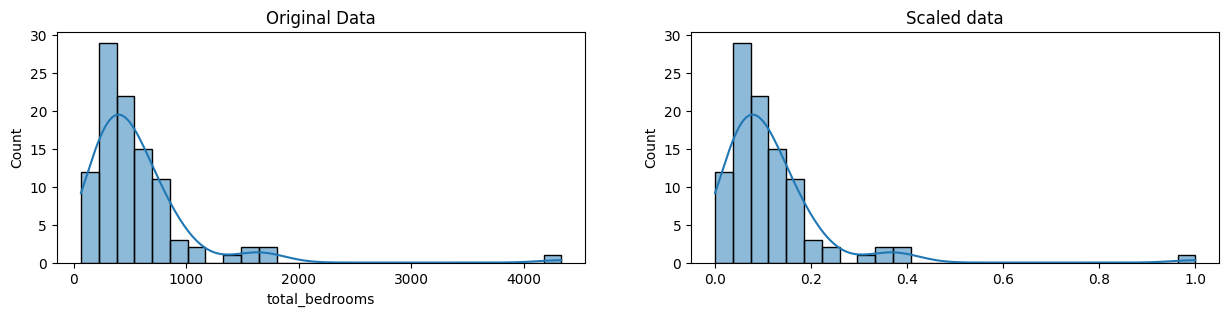

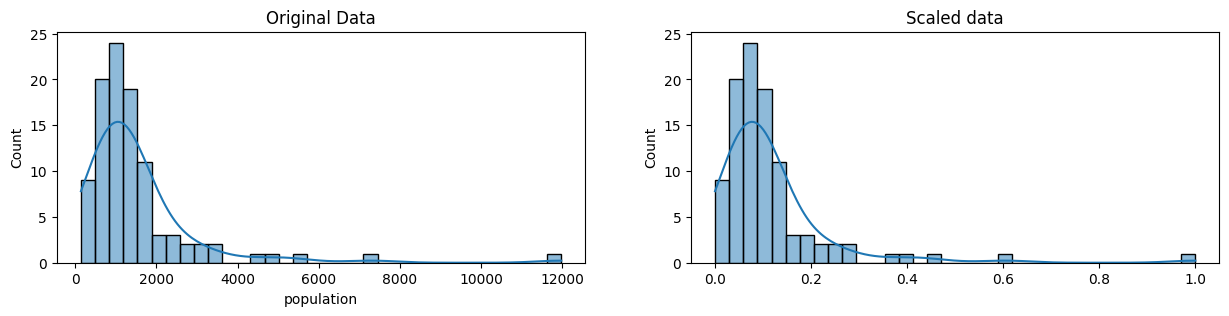

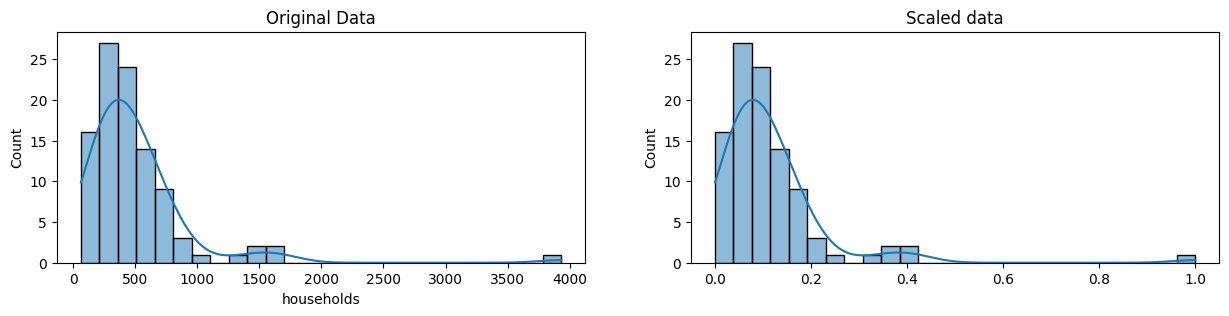

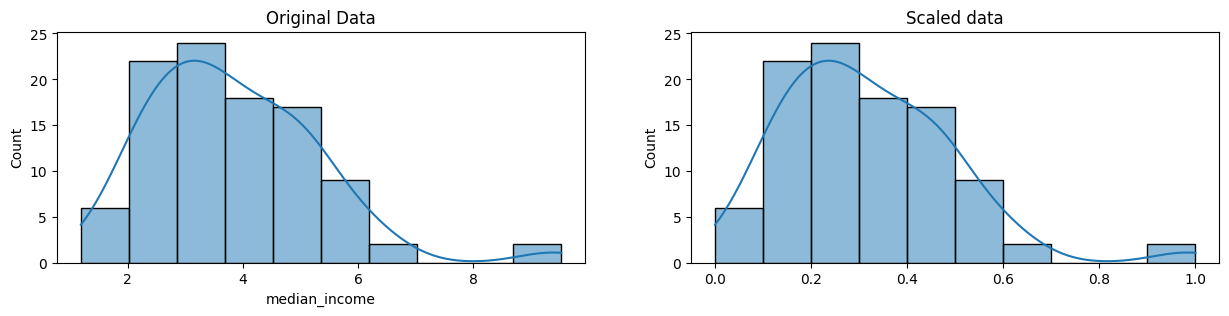

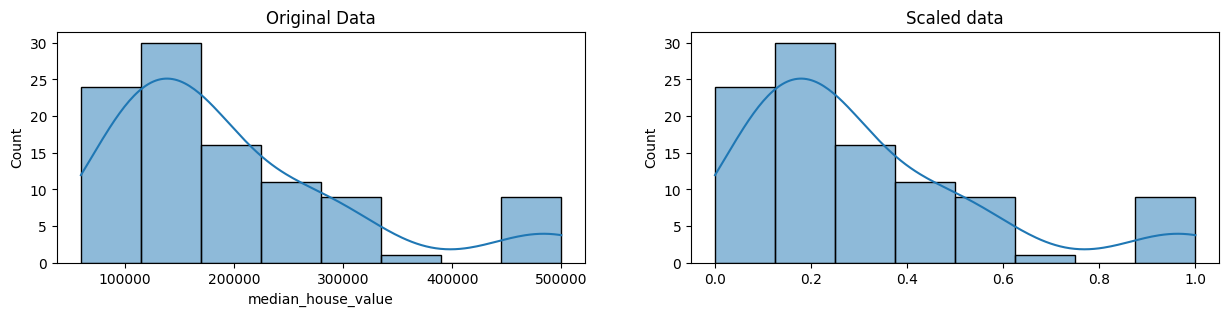

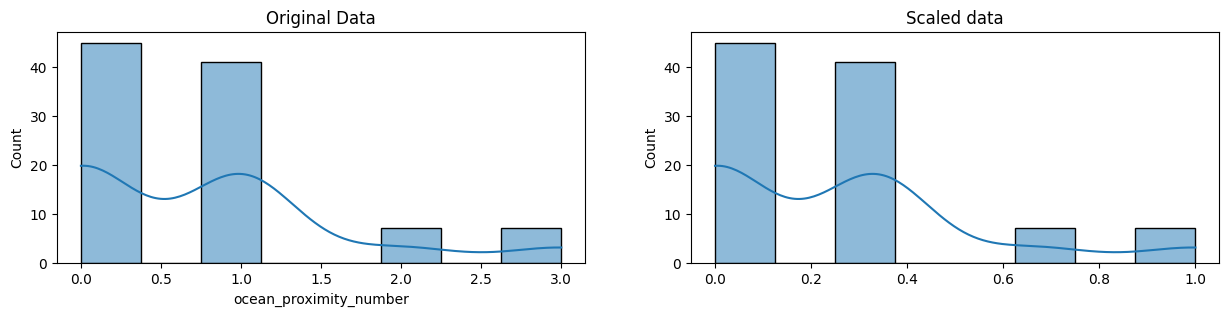

In [25]:
for i in columns:
    original_data = immo[i].sample(n=100, random_state = 1)

    # mix-max scale the data between 0 and 1
    scaled_data = minmax_scaling(original_data, columns=[0])

    # plot both together to compare
    fig, ax = plt.subplots(1, 2, figsize=(15, 3))
    sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
    ax[1].set_title("Scaled data")
    plt.show()

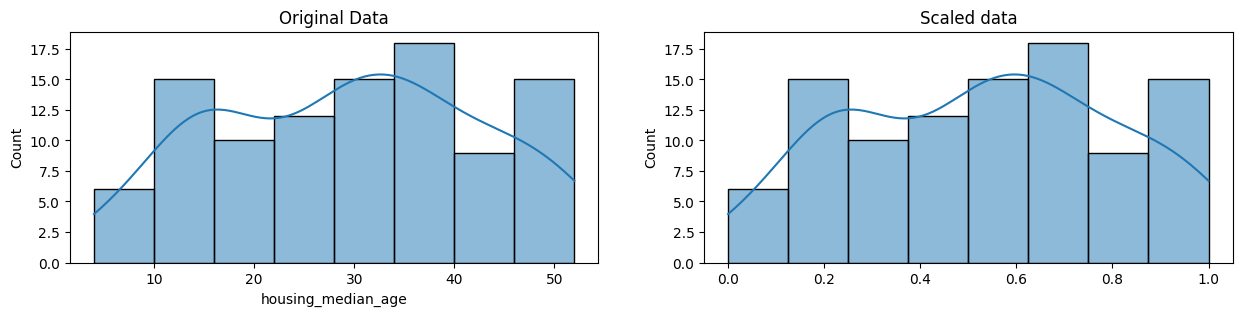

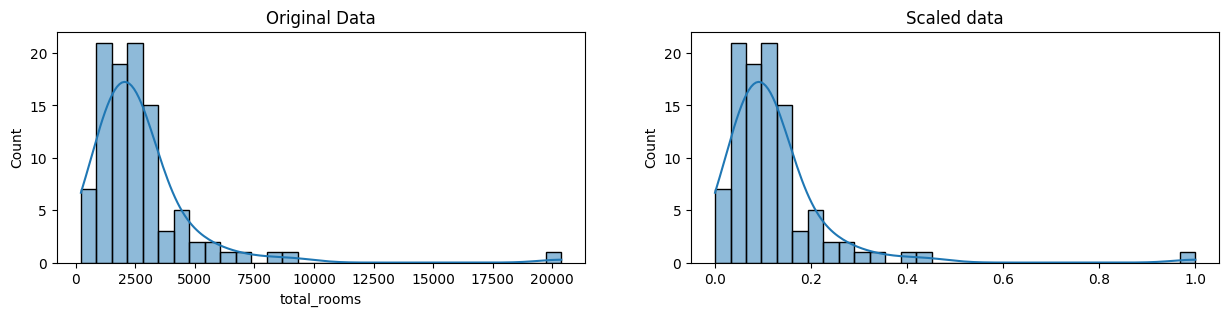

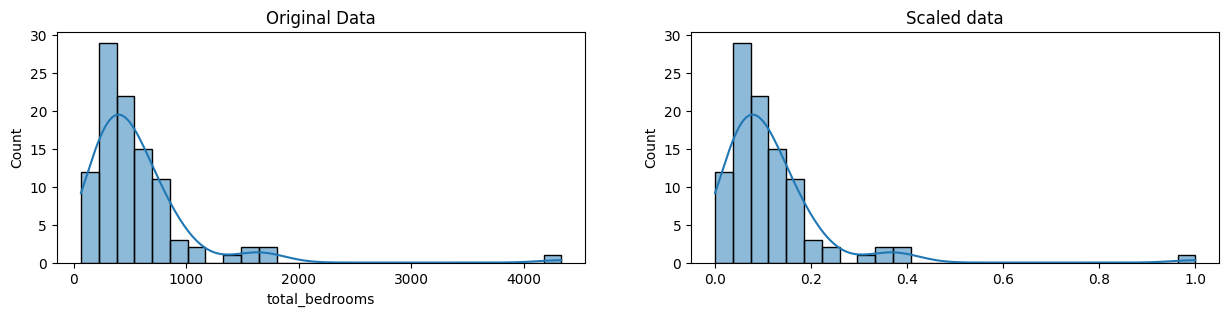

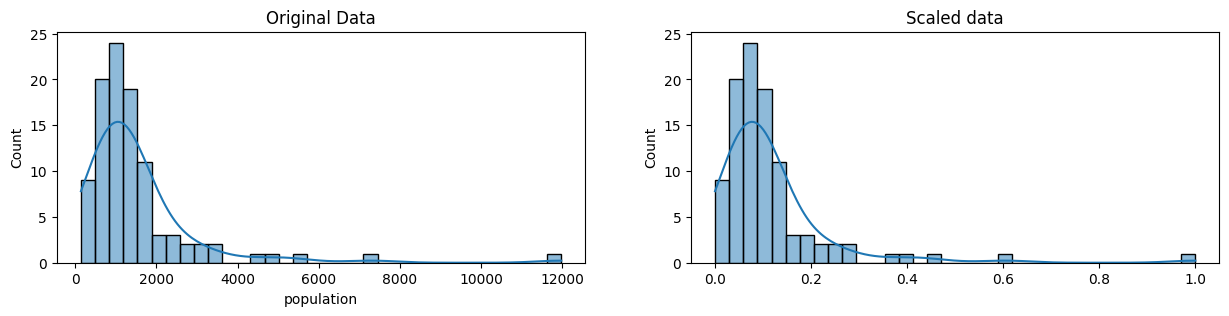

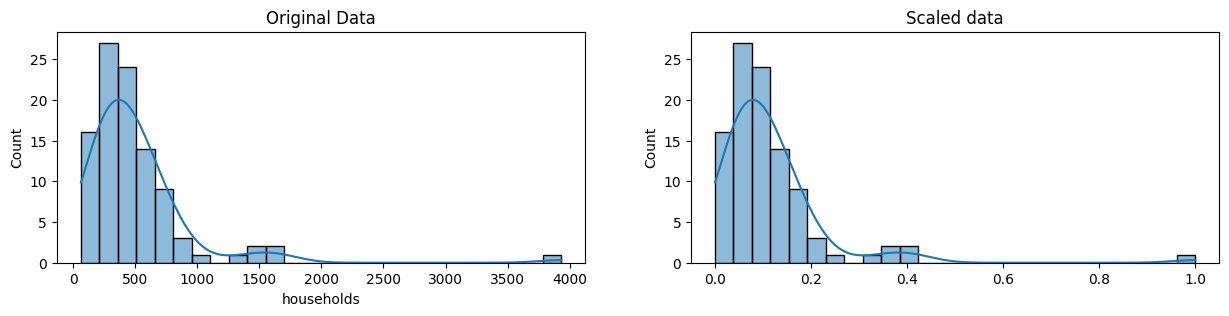

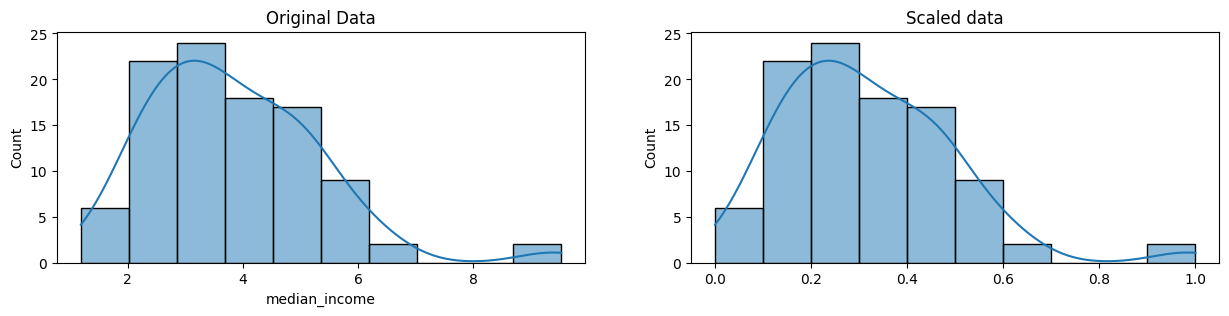

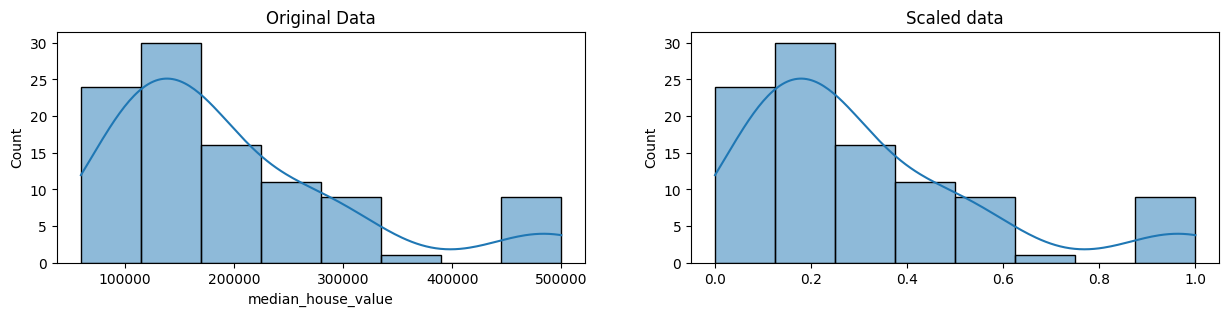

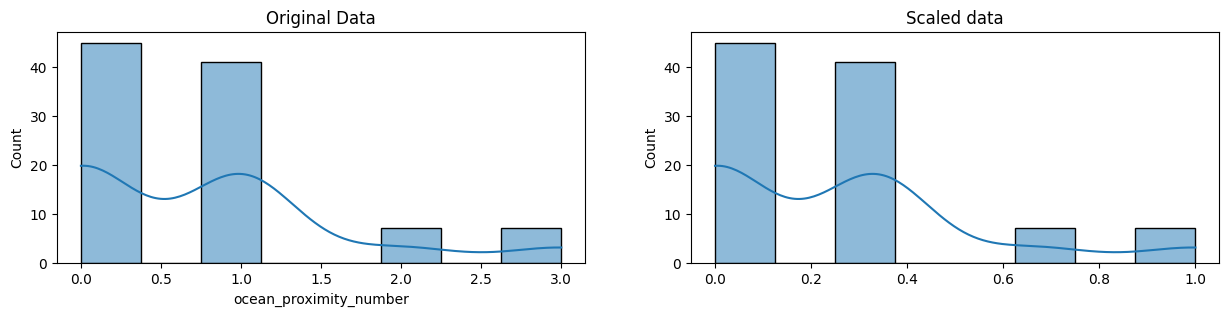

In [26]:
# generate 1000 data points randomly drawn from an exponential distribution
for i in columns_with:
    original_data = immo_with_imputation[i].sample(n=100, random_state = 1)

    # mix-max scale the data between 0 and 1
    scaled_data = minmax_scaling(original_data, columns=[0])

    # plot both together to compare
    fig, ax = plt.subplots(1, 2, figsize=(15, 3))
    sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
    ax[0].set_title("Original Data")
    sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
    ax[1].set_title("Scaled data")
    plt.show()

## Normalization

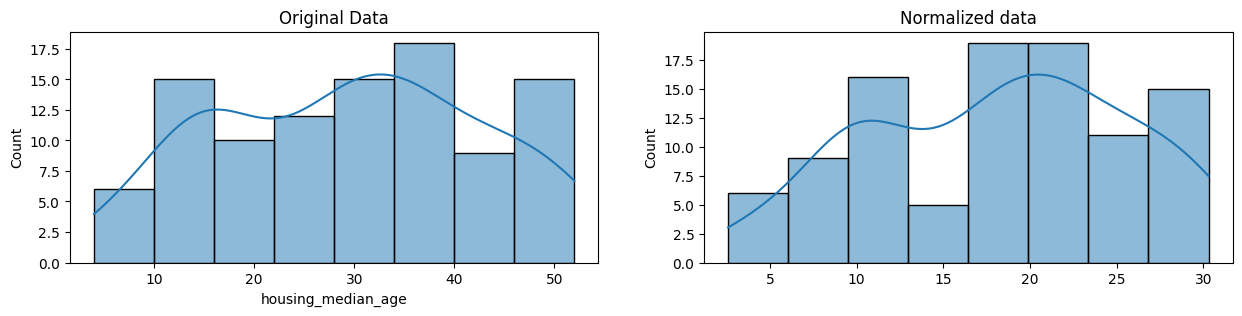

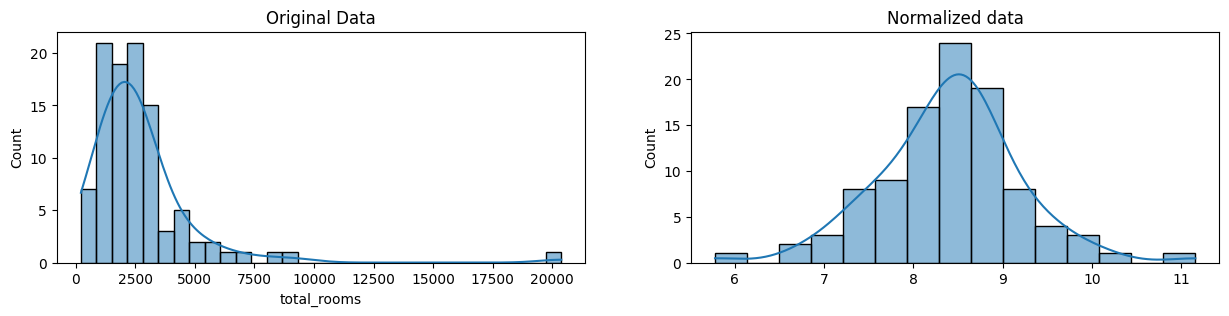

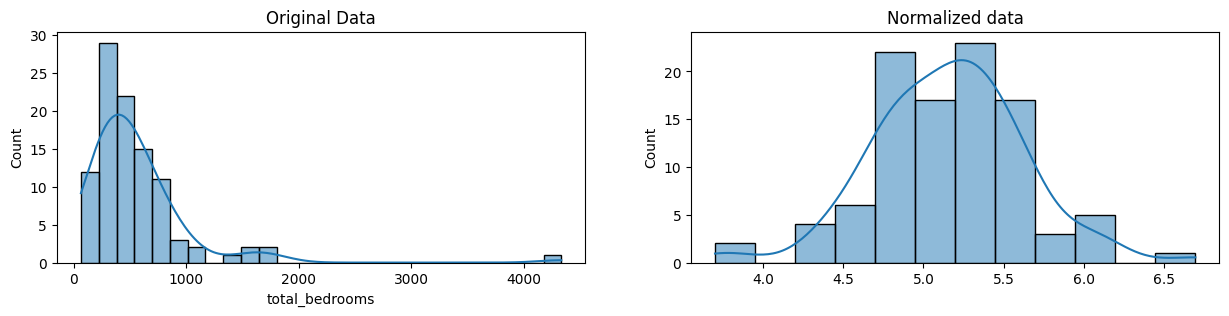

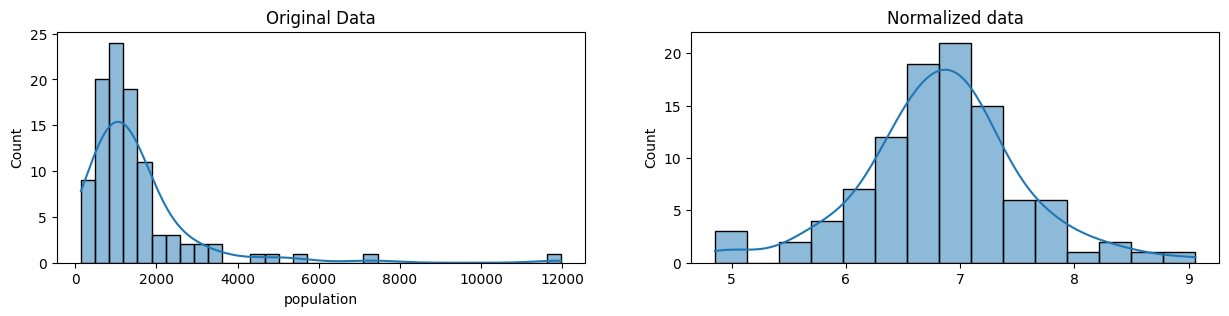

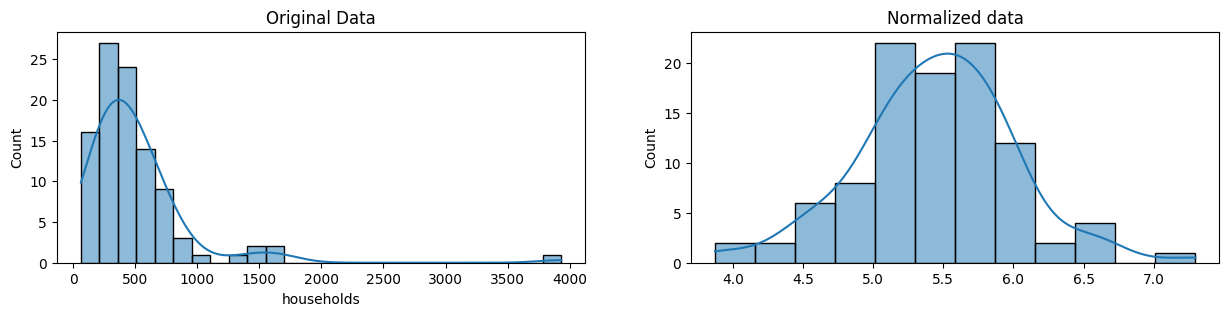

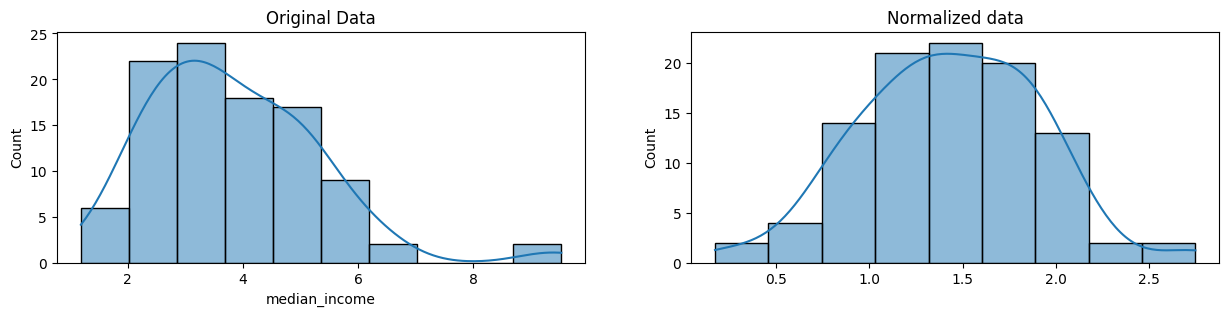

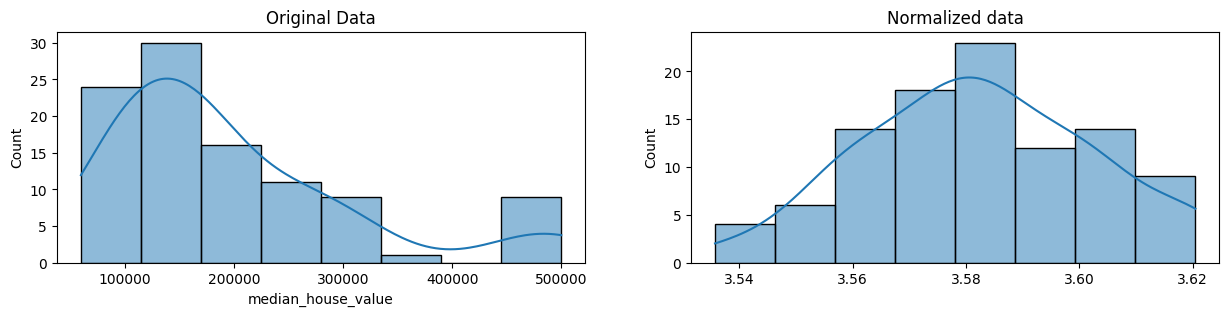

ValueError: Data must be positive.

In [27]:
# normalize the exponential data with boxcox
for i in columns:
    original_data = immo[i].sample(n=100, random_state = 1)
    normalized_data = stats.boxcox(original_data)

    # plot both together to compare
    fig, ax=plt.subplots(1, 2, figsize=(15, 3))
    sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
    ax[1].set_title("Normalized data")
    plt.show()

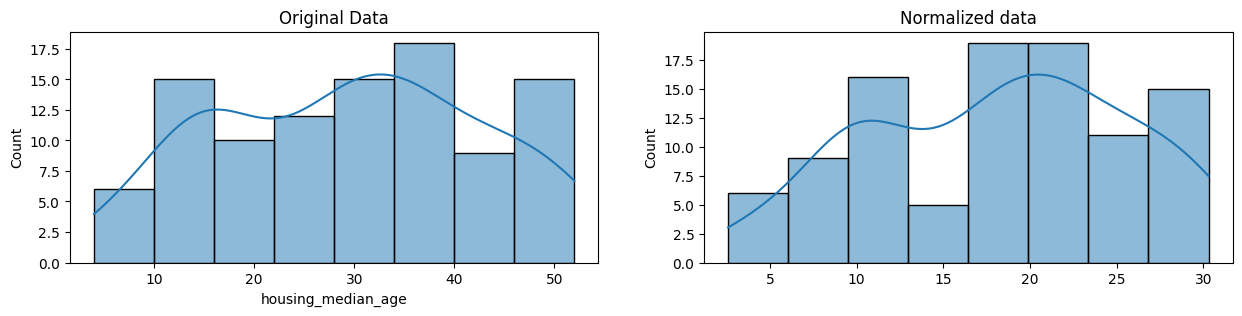

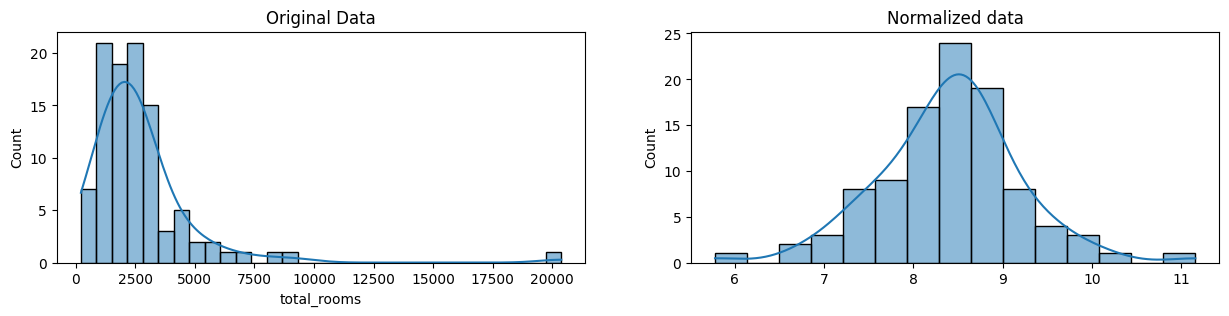

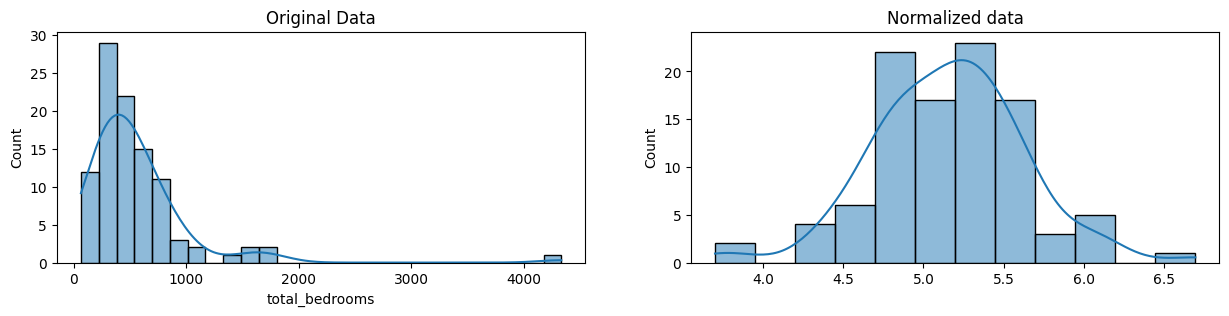

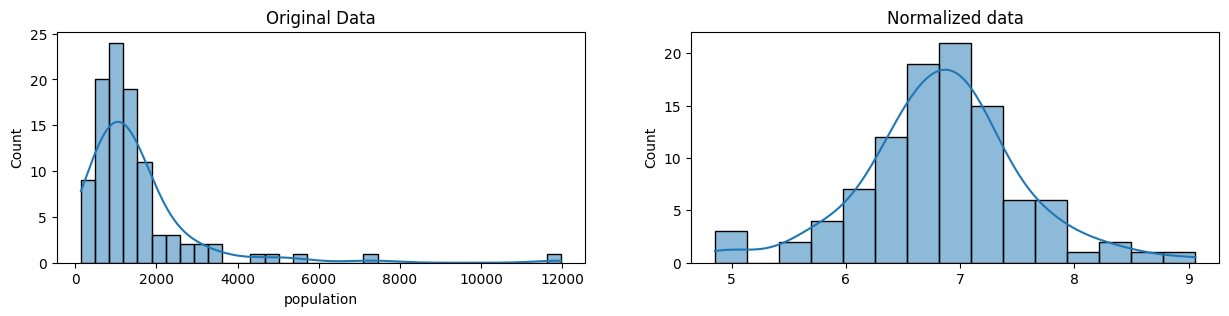

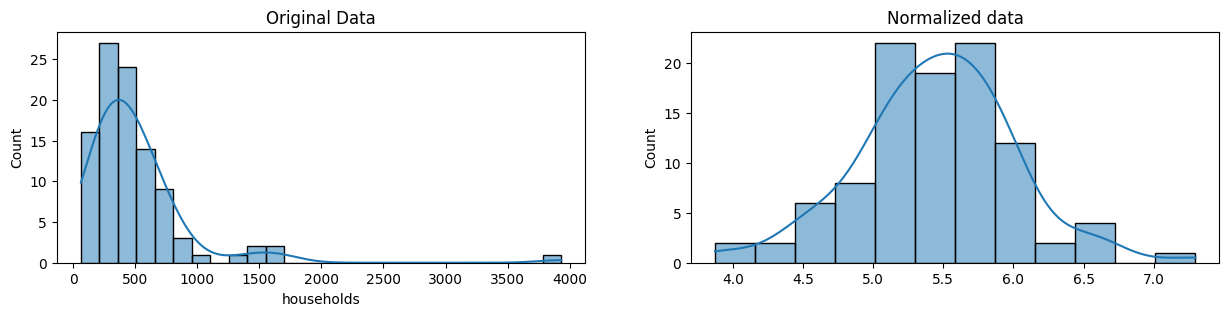

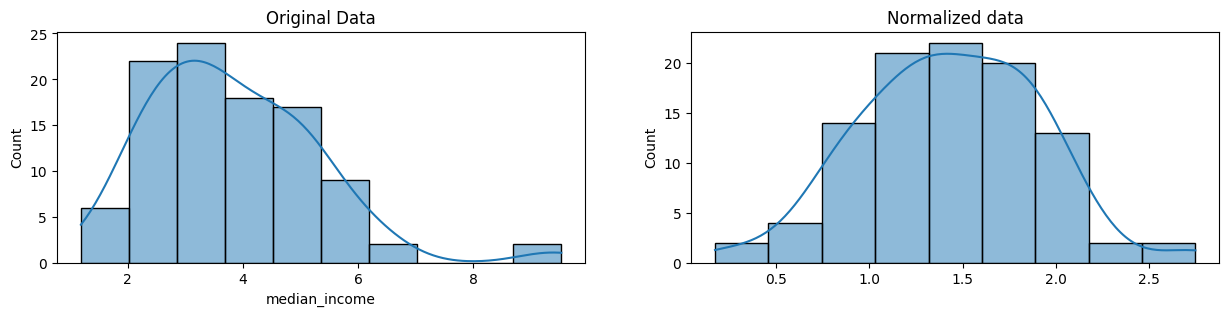

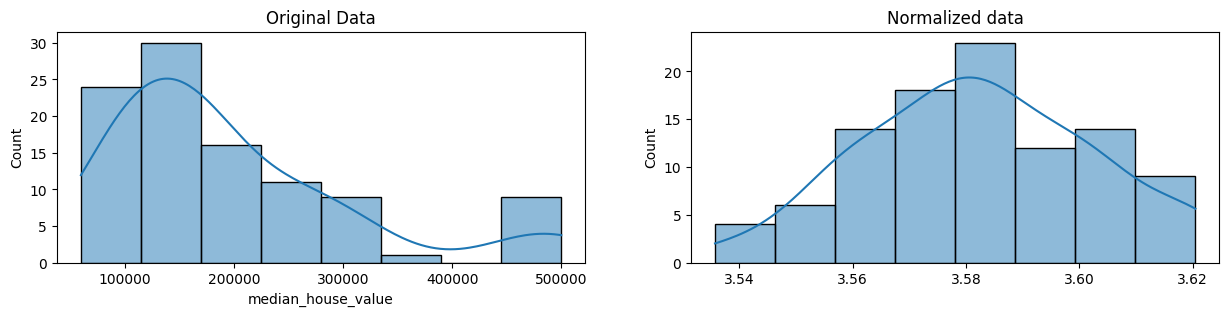

ValueError: Data must be positive.

In [28]:
for i in columns_with:
    original_data = immo_with_imputation[i].sample(n=100, random_state = 1)
    normalized_data = stats.boxcox(original_data)

    # plot both together to compare
    fig, ax=plt.subplots(1, 2, figsize=(15, 3))
    sns.histplot(original_data, ax=ax[0], kde=True, legend=False)
    ax[0].set_title("Original Data")
    sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
    ax[1].set_title("Normalized data")
    plt.show()

--- With the scaling method we can see they're outliers, i'm going to take off the outliers. 
The features: 'total_rooms', 'population' and 'median_income' follow a bell curve. The features:'households', 'total_bedrooms',and 'median_house_value' also follow a bell curve but not totally.
The feature 'housing_median_age' doesn't follow the bell curve.

Now i want to do some visualization to see witch features i'll choose. ---

# Visualization

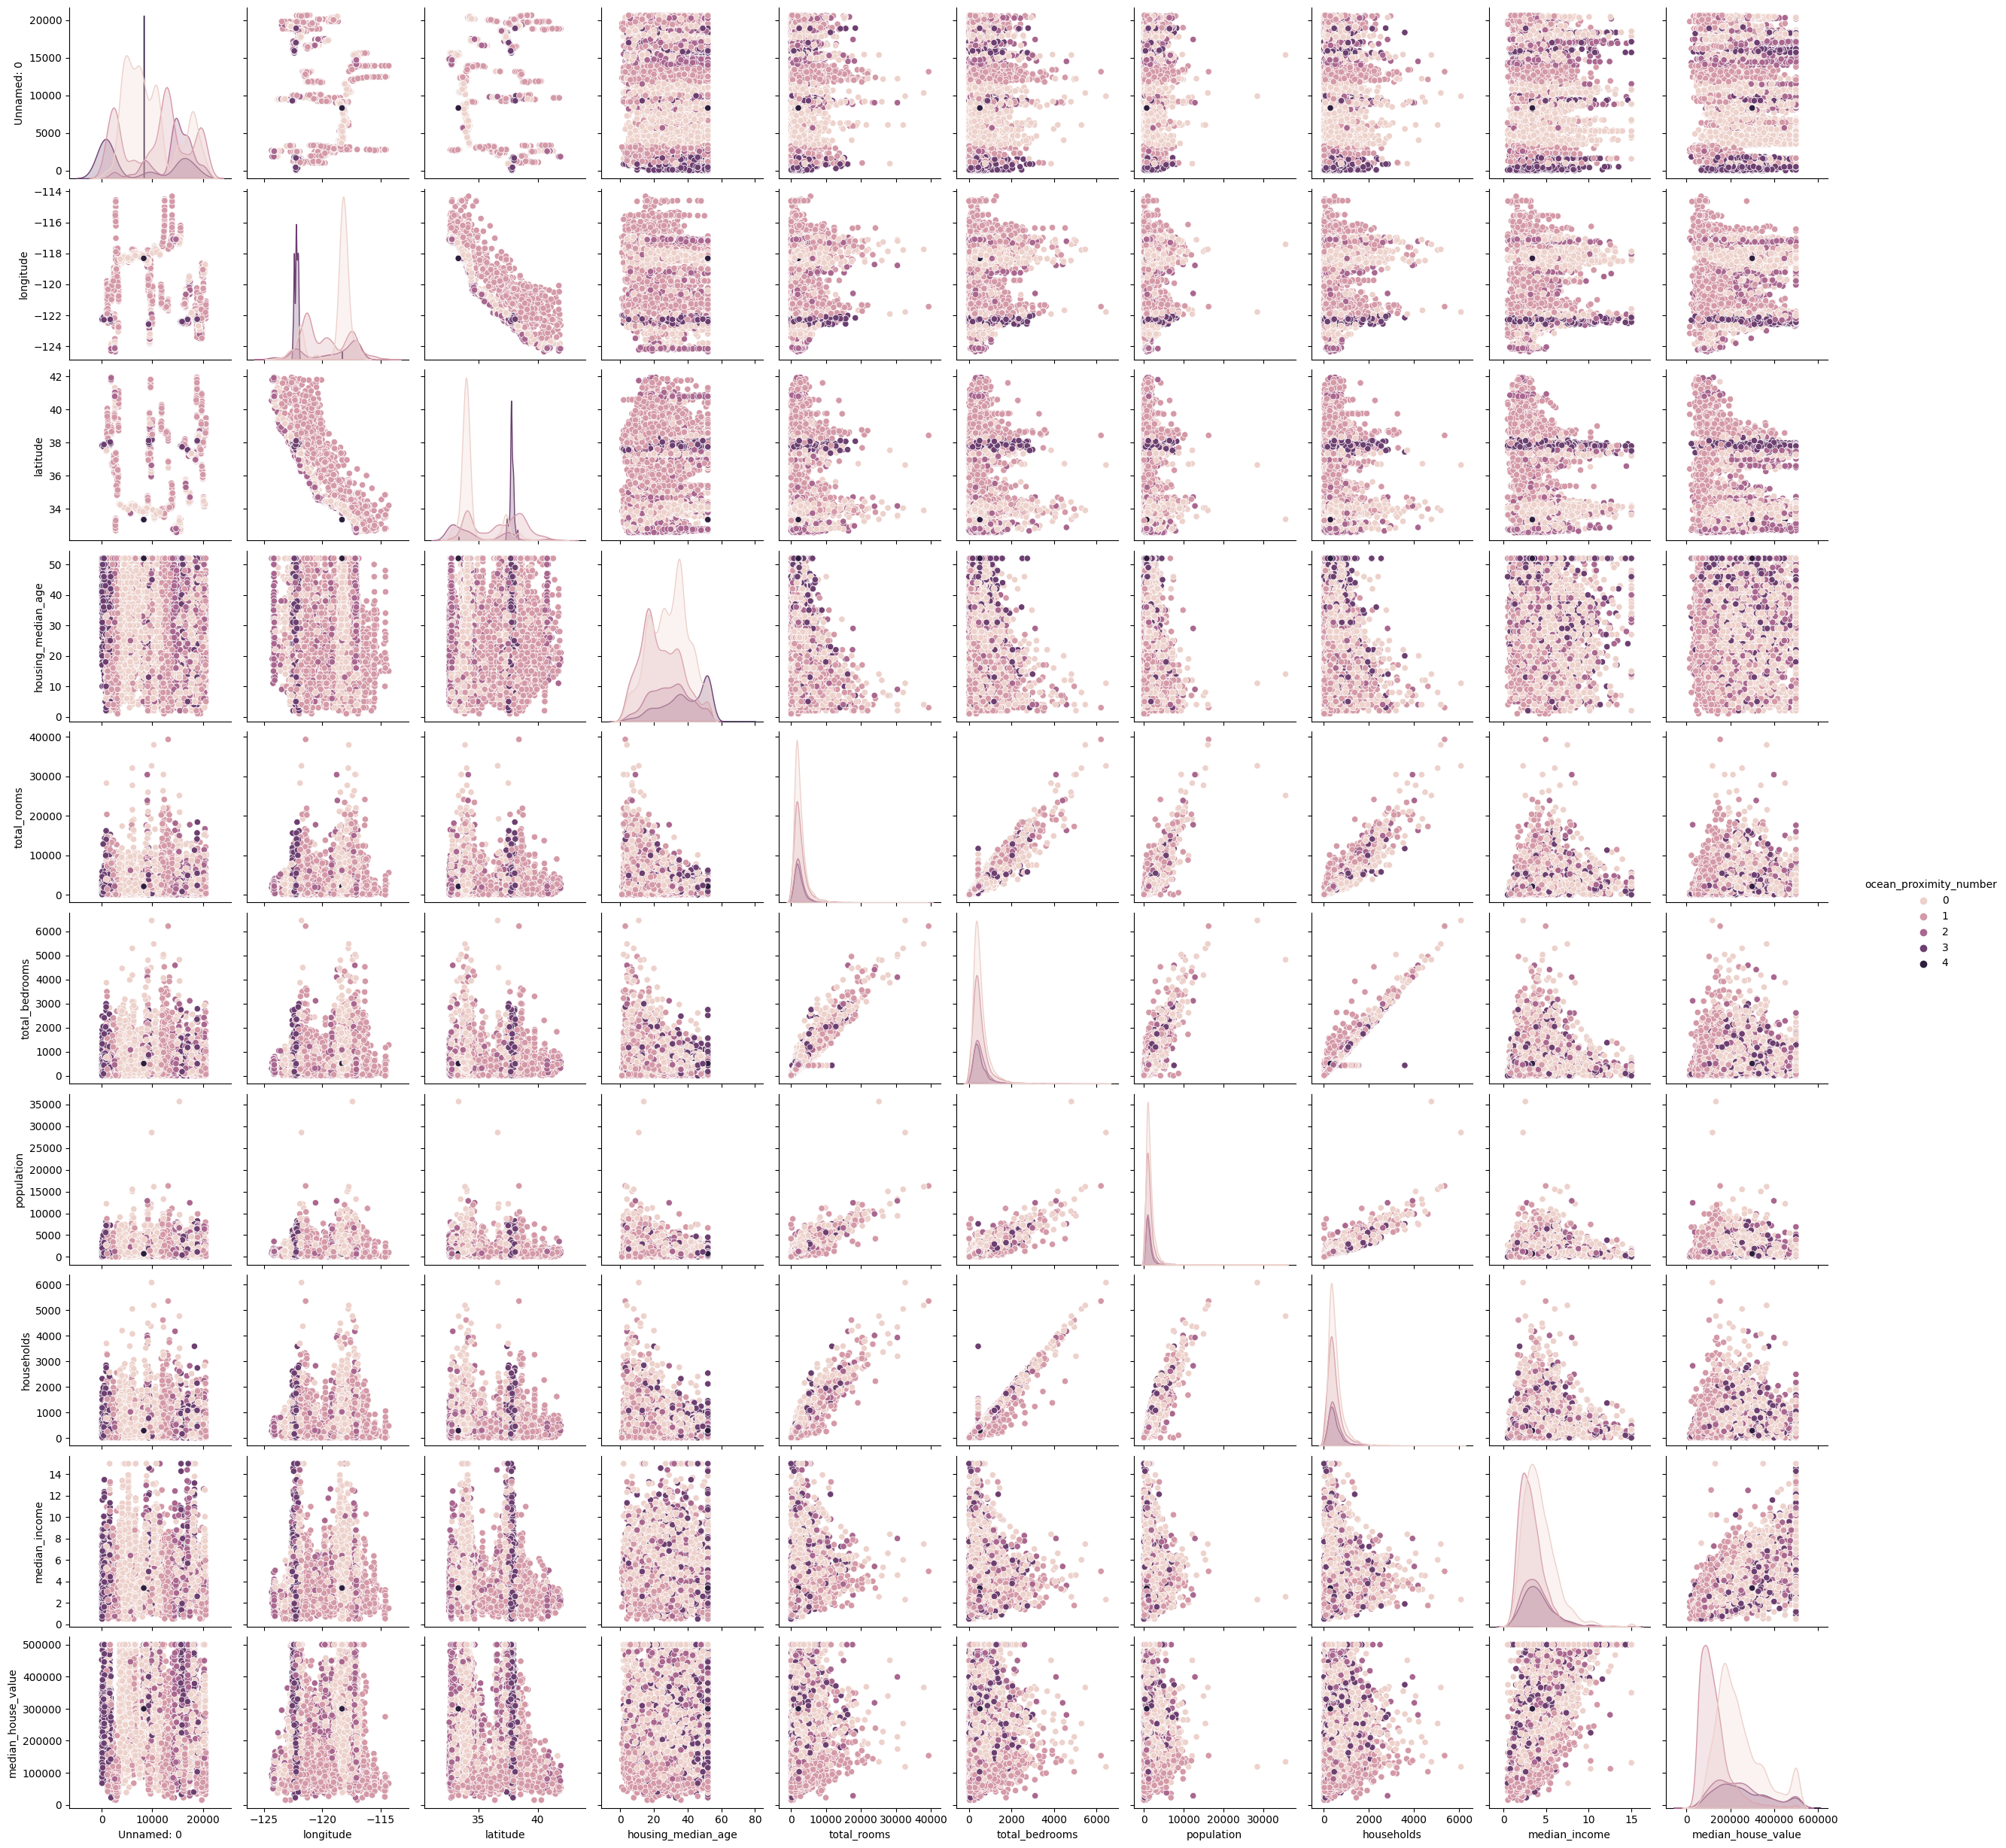

In [32]:
sns.pairplot(data=immo,hue="ocean_proximity_number")

In [ ]:
#sns.pairplot(data=immo_with_imputation,hue="ocean_proximity_number")

--- In this pairplot we can see with the features 'longitude' and 'latitude' the shape of california.
The features 'household', 'population','total_bedrooms' and 'total_rooms' are correlated. ---

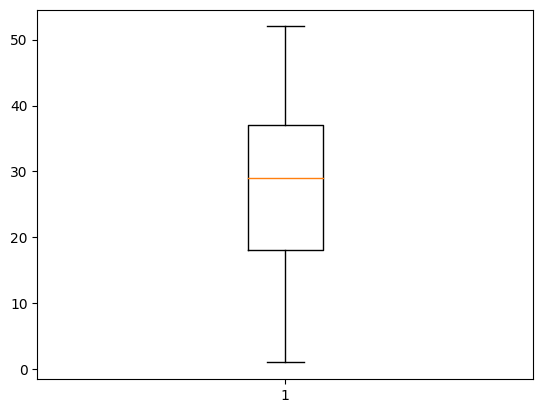

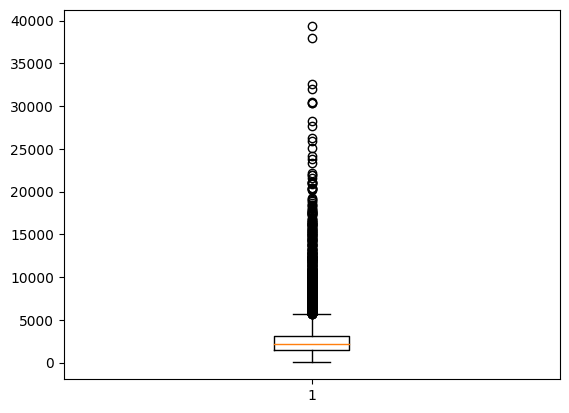

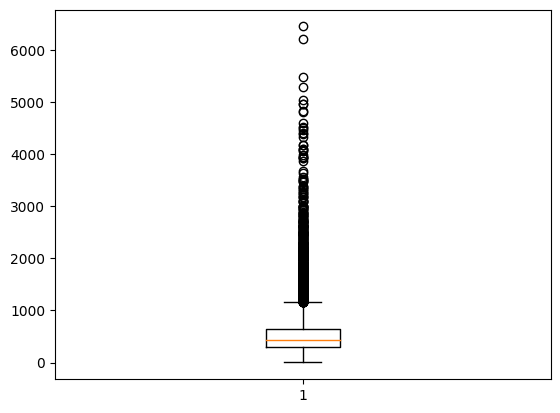

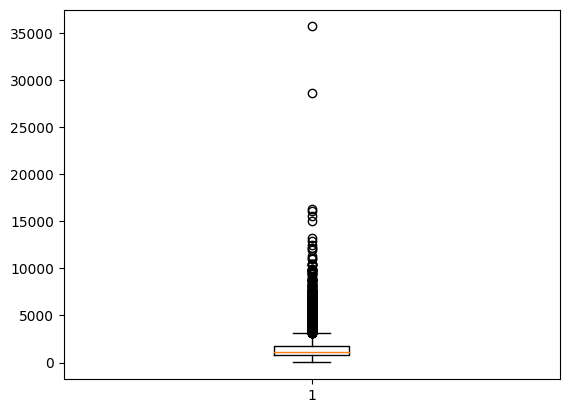

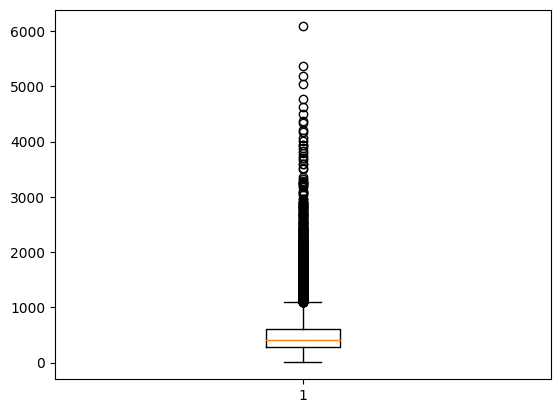

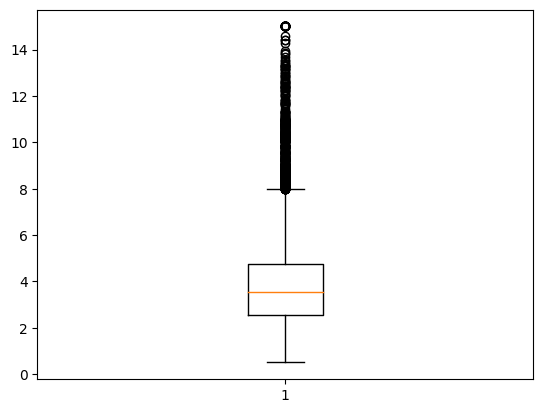

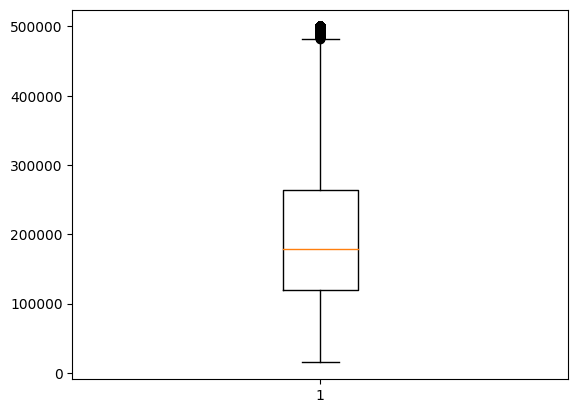

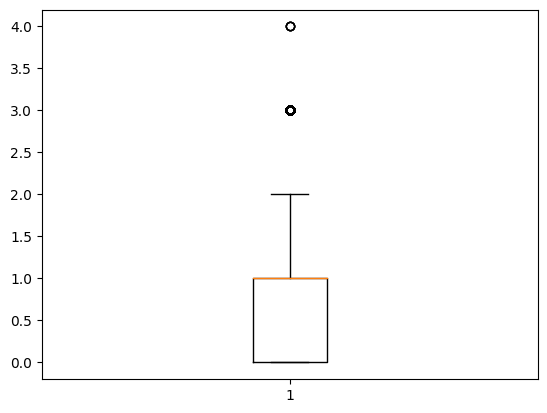

In [29]:
for i in columns:
    plt.boxplot(x=i, data=immo)
    plt.show()

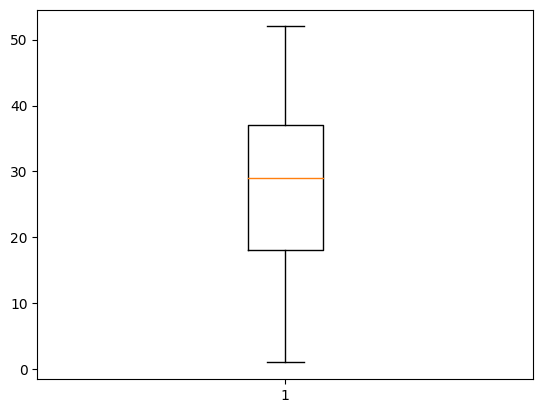

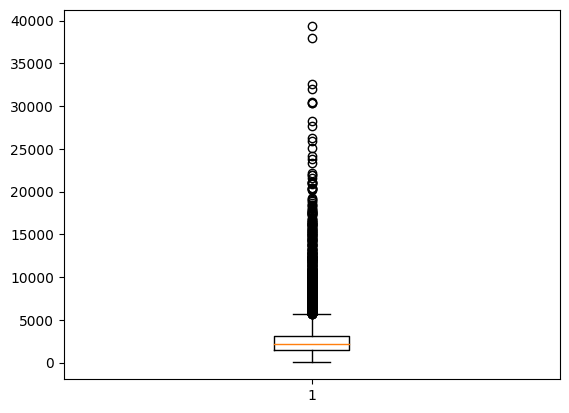

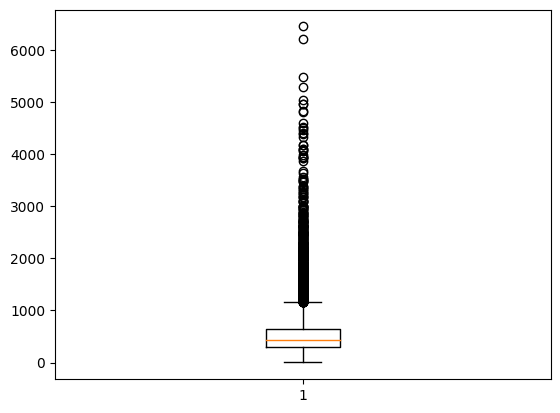

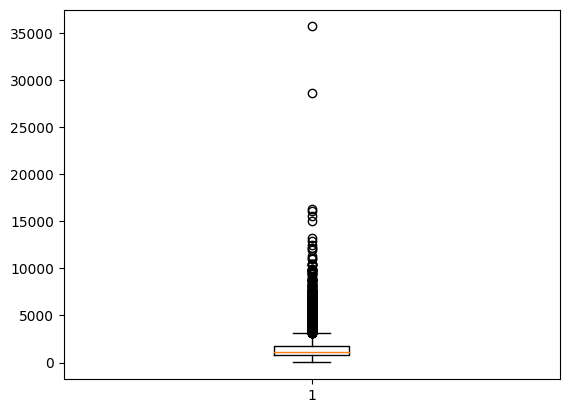

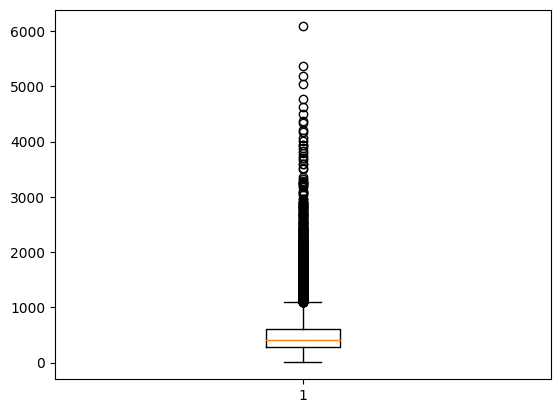

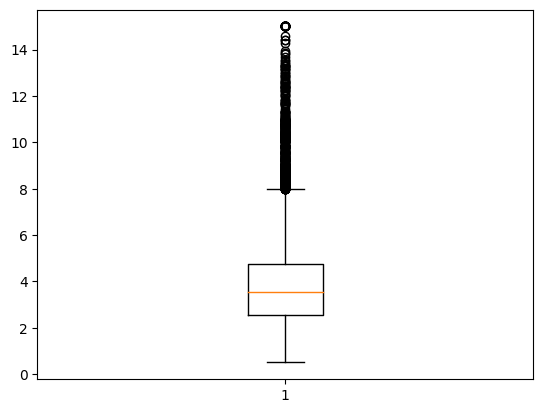

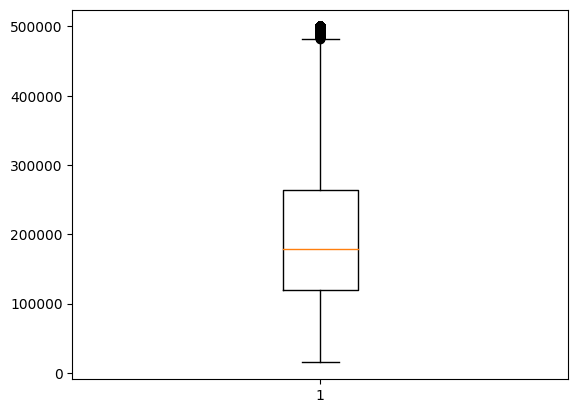

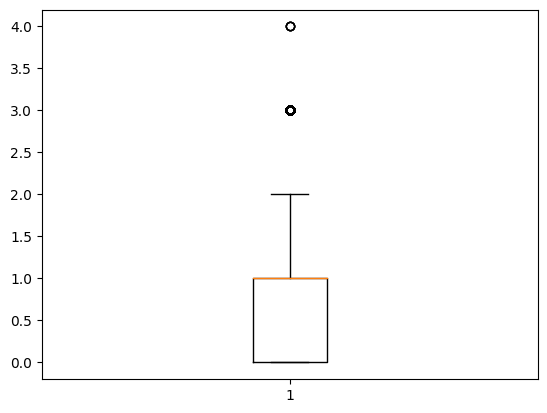

In [30]:
for i in columns_with:
    plt.boxplot(x=i, data=immo_with_imputation)
    plt.show()

--- The boxplot shows the features's outliers and mean. So after i should take off the outliers. ---

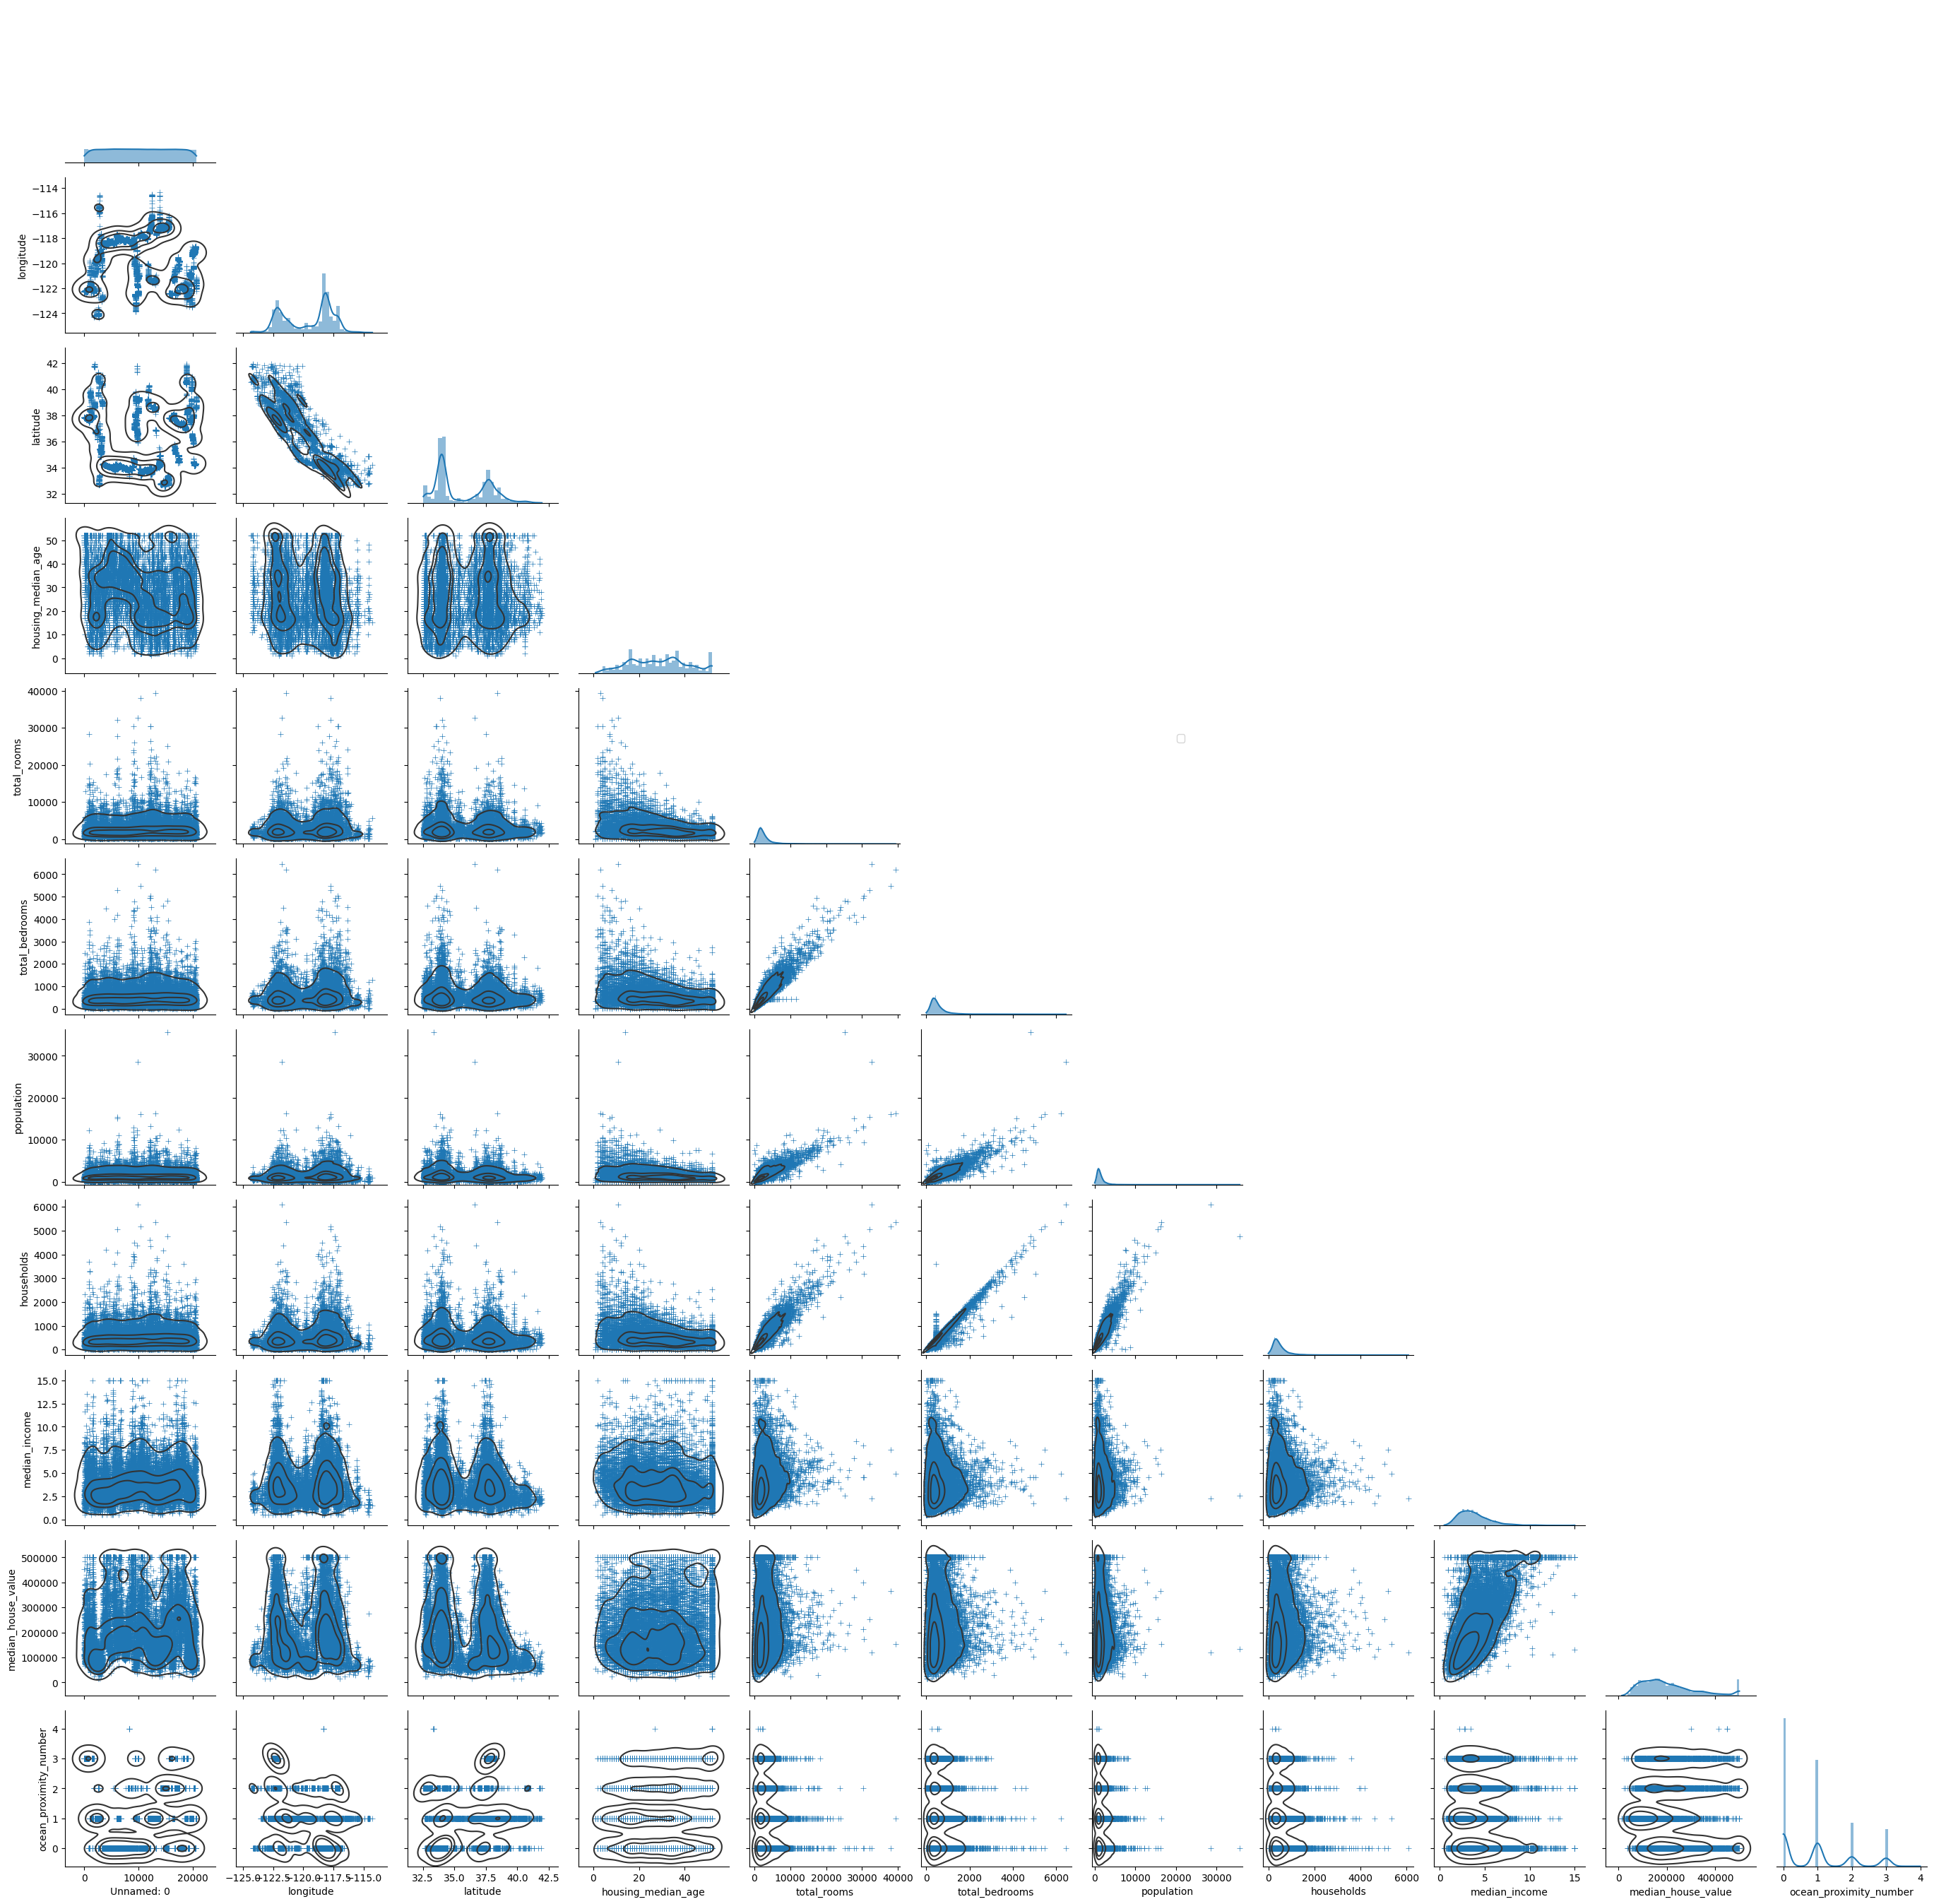

In [31]:
g = sns.PairGrid(data = immo,corner = True)
g.map_lower(sns.kdeplot, hue = None, levels = 4, color = ".2")
g.map_lower(sns.scatterplot, marker = "+")
g.map_diag(sns.histplot, element = 'step', linewidth=0,kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61,.6))

In [ ]:
# g = sns.PairGrid(data = immo_with_imputation,corner = True)
# g.map_lower(sns.kdeplot, hue = None, levels = 4, color = ".2")
# g.map_lower(sns.scatterplot, marker = "+")
# g.map_diag(sns.histplot, element = 'step', linewidth=0,kde=True)
# g.add_legend(frameon=True)
# g.legend.set_bbox_to_anchor((.61,.6))

--- Here the features 'household', 'population','total_bedrooms' and 'total_rooms' are correlated as we could see in the pairplot, we can also see the outliers and the distribution the 5th categories.  ---

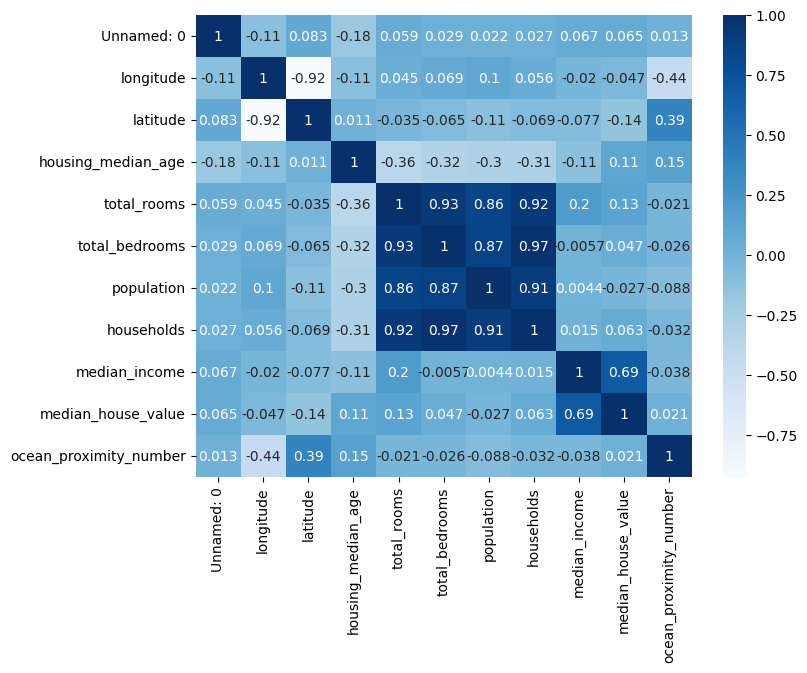

In [33]:
corr_df = immo.corr(method='pearson')

#plt.matshow(corr_df)
plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True,cmap=plt.cm.Blues)
plt.show()

--- This hit map shows all the positive and negative correlation, it's the same as we saw before, we can add to our exploration the feature 'median_house_value'. ---